# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [1]:
# Import necessary libraries
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from pathlib import Path
import importlib.util as ilu
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0])
# in standard python
#module_path = str(Path.cwd(__file__).parents[0] / "py")
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import read_data as rd


## Model Choice

[Explain why you've chosen a particular model as the baseline. This could be a simple statistical model or a basic machine learning model. Justify your choice.]


## Feature Selection

[Indicate which features from the dataset you will be using for the baseline model, and justify your selection.]


In [2]:
# Load the dataset
weather_df, sales_df, product_group_dict = rd.read_data()
weather_df = weather_df.dropna() # drop rows with missing values
merged_df = pd.merge(weather_df, sales_df, on='Date', how='inner') # inner join uses only date that are present in both dataframes

# Feature selection
# delete nnav and wwav columns (negative correlation with sales)
merged_df.drop(['nnav', 'wwav'], axis=1, inplace=True) 

merged_df.set_index('Date', inplace=True)
print(merged_df.head())
merged_df.describe(include='all')


            ttav  ffav Filiale Product Group       Sales
Date                                                    
2015-01-02  7.75    24       2            12   36.972801
2015-01-02  7.75    24       3             2   60.101109
2015-01-02  7.75    24       1            11  266.254971
2015-01-02  7.75    24       3             9   89.217757
2015-01-02  7.75    24       2             4   58.999279


,ttav,ffav,Filiale,Product Group,Sales
count,46230.000000,46230.000000,46230.0,46230.0,46230.000000
unique,NaN,NaN,3.0,13.0,NaN
top,NaN,NaN,3.0,6.0,NaN
freq,NaN,NaN,16061.0,4086.0,NaN
mean,11.109389,11.227904,NaN,NaN,135.479674
std,6.854838,4.303612,NaN,NaN,121.033090
min,-6.137500,3.000000,NaN,NaN,-17.000714
25%,5.750000,8.000000,NaN,NaN,69.601666
50%,10.500000,10.000000,NaN,NaN,106.746118
75%,16.650000,14.000000,NaN,NaN,161.376577


In [3]:
# scale the data
#data_scaler = MinMaxScaler()
dataset_df = merged_df.astype('float64')
labels_df = dataset_df.pop('Sales')

dataset_npy = dataset_df.to_numpy()
labels_npy = labels_df.to_numpy()

# scale the data
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()


In [4]:
# form training and test sets

dataset_npy_scaled =X_scaler.fit_transform(dataset_npy)
#labels_npy_scaled = Y_scaler.fit_transform(labels_npy.reshape(-1,1))

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset_npy_scaled, labels_npy, test_size=0.1, random_state=42)

(len(X_train), len(y_train)) , (len(X_test), len(y_test))

((41607, 41607), (4623, 4623))

## Implementation

[Implement your baseline model here.]



In [6]:
# Initialize and train the baseline model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.RMSprop())

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
1041/1041 [==============================] - 3s 2ms/step - loss: 14841.6621 - val_loss: 13930.4209
Epoch 2/100
1041/1041 [==============================] - 2s 2ms/step - loss: 12725.6787 - val_loss: 7704.4067
Epoch 3/100
1041/1041 [==============================] - 2s 2ms/step - loss: 7816.9375 - val_loss: 5485.1631
Epoch 4/100
1041/1041 [==============================] - 2s 2ms/step - loss: 6923.8530 - val_loss: 4964.6304
Epoch 5/100
1041/1041 [==============================] - 2s 2ms/step - loss: 6583.6758 - val_loss: 5333.4609
Epoch 6/100
1041/1041 [==============================] - 2s 2ms/step - loss: 6135.6802 - val_loss: 5471.6807
Epoch 7/100
1041/1041 [==============================] - 2s 2ms/step - loss: 5950.2817 - val_loss: 6690.1729
Epoch 8/100
1041/1041 [==============================] - 2s 2ms/step - loss: 5810.8960 - val_loss: 5798.5684
Epoch 9/100
1041/1041 [==============================] - 2s 2ms/step - loss: 5756.1348 - val_loss: 4531.8398
Epoch 10/100
104

## Evaluation

[Clearly state what metrics you will use to evaluate the model's performance. These metrics will serve as a starting point for evaluating more complex models later on.]



145/145 [==============================] - 0s 1ms/step


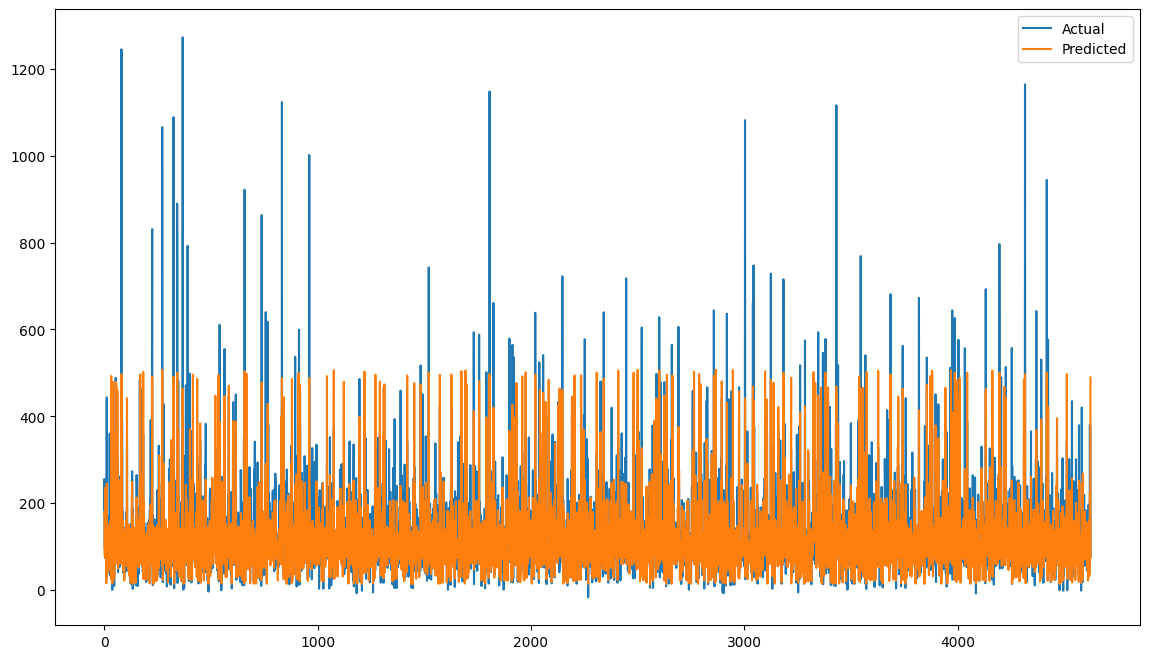

In [7]:
# Evaluate the baseline model
y_pred = model.predict(X_test)
#y_pred = Y_scaler.inverse_transform(y_pred_scaled)

#y_test = Y_scaler.inverse_transform(y_test)

#print(y_pred.shape, y_test.shape)
x = np.arange(len(y_test))

# plot the results
plt.figure(figsize=(14,8))
plt.plot(x, y_test, label='Actual')
plt.plot(x, y_pred, label='Predicted')
plt.legend()
plt.show()



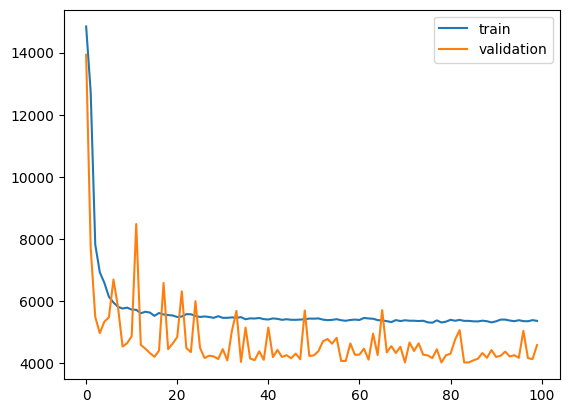

In [8]:
# plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [9]:
model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001))

history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
1041/1041 [==============================] - 3s 2ms/step - loss: 5094.8774 - val_loss: 3962.2747
Epoch 2/200
1041/1041 [==============================] - 2s 2ms/step - loss: 5075.3887 - val_loss: 3943.8865
Epoch 3/200
1041/1041 [==============================] - 2s 2ms/step - loss: 5052.9438 - val_loss: 4023.5647
Epoch 4/200
1041/1041 [==============================] - 2s 2ms/step - loss: 5069.8589 - val_loss: 3941.8975
Epoch 5/200
1041/1041 [==============================] - 2s 2ms/step - loss: 5067.3105 - val_loss: 3937.2788
Epoch 6/200
1041/1041 [==============================] - 2s 2ms/step - loss: 5057.6445 - val_loss: 3971.1985
Epoch 7/200
1041/1041 [==============================] - 2s 2ms/step - loss: 5058.3906 - val_loss: 3988.3574
Epoch 8/200
1041/1041 [==============================] - 2s 2ms/step - loss: 5055.9800 - val_loss: 3950.2280
Epoch 9/200
1041/1041 [==============================] - 2s 2ms/step - loss: 5053.1519 - val_loss: 3958.5623
Epoch 10/200
1041/1

145/145 [==============================] - 0s 1ms/step


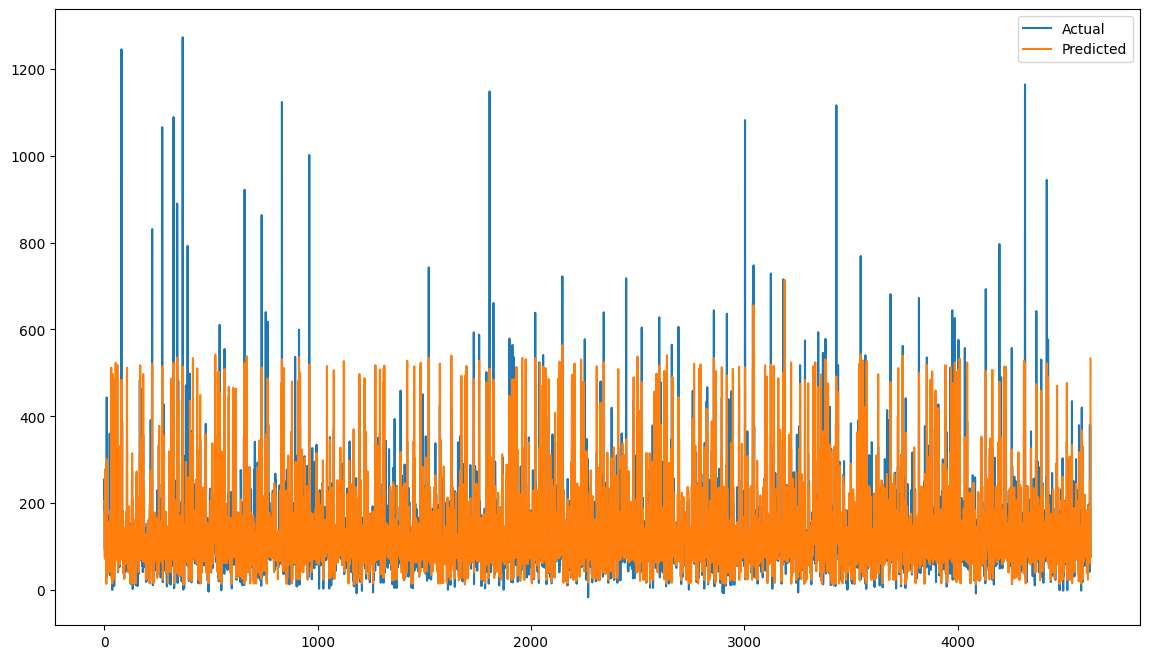

In [ ]:
# Evaluate the baseline model
y_pred = model.predict(X_test)
#y_pred = Y_scaler.inverse_transform(y_pred_scaled)

#y_test = Y_scaler.inverse_transform(y_test)

#print(y_pred.shape, y_test.shape)
x = np.arange(len(y_test))

# plot the results
plt.figure(figsize=(14,8))
plt.plot(x, y_test, label='Actual')
plt.plot(x, y_pred, label='Predicted')
plt.legend()
plt.show()

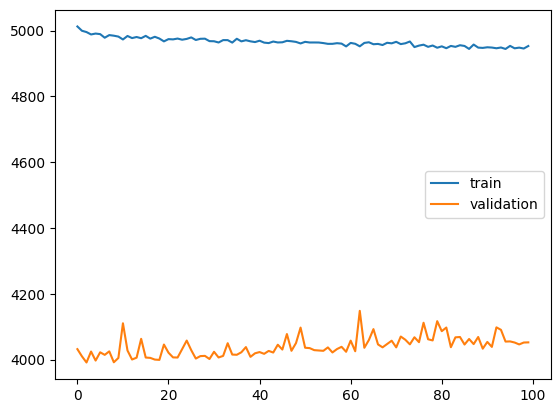

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()